# Azure Machine Learning - SHAP Examples
Sample notebook demonstrating how to load data from an AML workspace, train a custom regression model, and generate model explanations using the open-source SHAP python library

### Connect to AML workspace
Connect to Azure Machine Learning workspace and get a reference to the default datastore

In [1]:
from azureml.core import Workspace, Dataset, Datastore
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import shap
import matplotlib.pyplot as plt

ws = Workspace.from_config()

ds = ws.get_default_datastore()

In [ ]:
# !pip install shap==0.37

### Load sample datasets from AML
These datasets can be created by running the `UploadData.ipynb` notebook contained in this GitHub repo

In [3]:
training_df = Dataset.get_by_name(ws, 'HomePrices-Training').to_pandas_dataframe()
testing_df = Dataset.get_by_name(ws, 'HomePrices-Testing').to_pandas_dataframe()

### Identify target column and break dataframes into X/y train/test subsets

In [5]:
target_column = 'MEDV'

X_train = training_df.drop(columns=[target_column])
y_train = training_df[[target_column]]

X_test = testing_df.drop(columns=[target_column])
y_test = testing_df[[target_column]]

### Train a custom Scikit-Learn model

In [6]:
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Generate and save SHAP summary plots
Sample code here was pulled from SHAP's excellent documentation available at [https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html).

Generated charts are saved to pngs

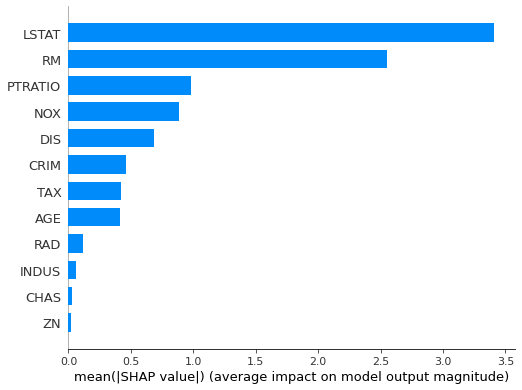

In [16]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig('./summary_plot.png')
plt.show()

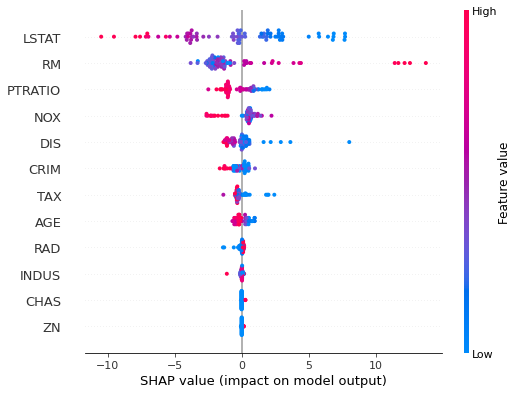

In [22]:
shap.matplotlib.pyplot.close()
fig = shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('./summary_plot_2.png')
plt.show()